<a href="https://colab.research.google.com/github/Pavithra2530/Task5---D48/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats

import statsmodels.api as sm
import json
import time
import pylab
from scipy import stats
from datetime import date
import datetime as dt

import plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

from IPython.display import display, Math, Latex

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [33]:
takehome_users = pd.read_csv('takehome_users.csv',encoding='ISO-8859-1')
takehome_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
takehome_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


2. Usage summary table

In [9]:
from IPython.display import HTML
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

In [15]:
takehome_user_engagement=pd.read_csv('/takehome_user_engagement.csv')
takehome_user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [16]:
takehome_user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


**TASK 5 - Question**

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven day period, identify which factors predict future user adoption.

We suggest spending 1-2 hours on this, but you're welcome to spend more or less.

Please send us a brief write-up of your findings (the more concise, the better no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach.

Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable.

**Thoughts: - Question**

takehome_users:

Need to make sure the date/time variables are coded as such. One of the column titles is inconsistent with the data description. Certainly not all of the data is going to be useful, certainly not the personal details of the users.

takehome_user_engagement:

The time stamp is going to need to be changed

a. I'm already thinking that the data are going to need to be merged between the user_engagement dataset and the user dataset.
b. Since the question mentioned seven day units I will need to code weekly units.

In [19]:
engage.time_stamp = pd.to_datetime(engage.time_stamp)
engage = engage.set_index('time_stamp', drop= True)

In [54]:
import datetime
from datetime import timedelta

In [59]:
def get_date_int(df, column):
    '''
    This handy function parses year,month,week,day.
    '''
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

def get_week(x): return x.isocalendar()

def get_iso_date_int(df,column):
    '''
    With time coded as iso (year,week,day) this seperates those time periods.
    '''
    temp_df=pd.DataFrame(df[column].tolist(), index=df.index)
    year,week,day=temp_df[0],temp_df[1],temp_df[2]
    return year,week,day

In [60]:
takehome_users = pd.read_csv('takehome_users.csv',encoding='ISO-8859-1')
#code creation_time,last_session_time as date/time
takehome_users.creation_time = pd.to_datetime(takehome_users['creation_time'])
takehome_users.last_session_creation_time = pd.to_datetime(takehome_users['last_session_creation_time'])
#change column heading
takehome_users['user_id'] = takehome_users['object_id']
#drop original column
takehome_users.drop('object_id', axis=1, inplace=True)
#drop private information
takehome_users.drop(['name', 'email'], axis=1, inplace=True)

takehome_users.head()

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id
0,2014-04-22 03:53:30,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,1
1,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2
2,2013-03-19 23:14:52,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,3
3,2013-05-21 08:09:28,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,4
4,2013-01-17 10:14:20,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,5


In [61]:
takehome_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               12000 non-null  datetime64[ns]
 1   creation_source             12000 non-null  object        
 2   last_session_creation_time  8823 non-null   datetime64[ns]
 3   opted_in_to_mailing_list    12000 non-null  int64         
 4   enabled_for_marketing_drip  12000 non-null  int64         
 5   org_id                      12000 non-null  int64         
 6   invited_by_user_id          6417 non-null   float64       
 7   user_id                     12000 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(1)
memory usage: 750.1+ KB


In [62]:
#make user engagement time_stamp into date/time
takehome_user_engagement['time_stamp'] = pd.to_datetime(takehome_user_engagement['time_stamp'])
#Make a weekly unit for time stamp
takehome_user_engagement['week_time_stamp']=takehome_user_engagement['time_stamp'].apply(get_week)

In [63]:
print('First user engagement timestamp:',min(takehome_user_engagement.time_stamp))
print('Last user engagement timestamp:',max(takehome_user_engagement.time_stamp))

First user engagement timestamp: 2012-05-31 08:20:06
Last user engagement timestamp: 2014-06-06 14:58:50


In [64]:
#Create Year,Month,Week,and Day units. To be fair I would be doing this regardless of use,

year, month, day=get_date_int(takehome_user_engagement, 'time_stamp')
takehome_user_engagement['year'],takehome_user_engagement['month'],takehome_user_engagement['day']=year,month,day
takehome_user_engagement['week']=takehome_user_engagement['time_stamp'].dt.week
#Make year and week, So if we are dealing with 52 week units then I want year to make it individual unit of time
iso_year,iso_week,iso_day=get_iso_date_int(takehome_user_engagement,'week_time_stamp')
takehome_user_engagement['year_week']=list(zip(iso_year,iso_week))

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven day period, identify which factors predict future user adoption.

a. After playing with the data and thinking about the problem I decided the easiest time scale to use is the year/week units I created. I minimized the data to values I will need to solve the problem of 'adopted users'.

In [65]:
takehome_user_engagement=takehome_user_engagement.sort_values(['time_stamp','user_id'],ascending=True)
takehome_user_engagement=takehome_user_engagement[['user_id','visited','day','year_week']]

In [69]:
# Label dictionary
adopted_user_dict={}
#number of year/week units
weeks=takehome_user_engagement.year_week
#individual user ids
user_ids=list(set(takehome_user_engagement['user_id']))
#loop over user ids
for i in range(len(user_ids)):
    user_id=user_ids[i]

    reduced_df=takehome_user_engagement[(takehome_user_engagement['user_id']==user_id)&(weeks.isin(weeks[weeks.duplicated()]))]
   
    week_counts=reduced_df.year_week.value_counts()[reduced_df.year_week.value_counts()>2]
    three_logins=reduced_df[reduced_df.year_week.isin(list(week_counts.index))]
    #remove duplicates of 3 day events within week
    three_logins=three_logins[~three_logins.duplicated()]
    #code user id and number of 3 day events
    adopted_user_dict[str(user_id)]=len(three_logins)

In [70]:
#apply the label dictionary to user ids coded to the column (engagement_index)
takehome_user_engagement['engagement_index']=takehome_user_engagement['user_id'].apply(lambda x: adopted_user_dict[str(x)])
#Code engagement_index as boolean values, which will be the adopted_user records
takehome_user_engagement['adopted_user']=0
takehome_user_engagement['adopted_user'][takehome_user_engagement['engagement_index']>0]=1

In [71]:
adopted_count=takehome_user_engagement[['user_id','adopted_user']][takehome_user_engagement['adopted_user']==1].groupby('user_id').count()
print('Number of adopted users:',len(adopted_count))

Number of adopted users: 1445


We have 1445 users who have logged in within 7 day period on 3 separate days

In [73]:
#Narrow down the dataset for merging
adopted=takehome_user_engagement[['user_id','adopted_user']]
#Merge the adopted user info to users dataframe
adopted_users = pd.merge(takehome_users, adopted, on='user_id', how='outer')

After merging the 'adopted_users' to the larger 'users' dataset I will modify the time units to useful units, once again I am not certain which time units I will need but is a thing I typically do so I have options for different scales of time.

In [74]:
creation_year, creation_month, creation_day=get_date_int(adopted_users, 'creation_time')
last_session_year, last_session_month, last_session_day=get_date_int(adopted_users, 'last_session_creation_time')
adopted_users['creation_year'],adopted_users['creation_month'],adopted_users['creation_day']=creation_year, creation_month, creation_day
adopted_users['last_session_year'],adopted_users['last_session_month'],adopted_users['last_session_day']=last_session_year, last_session_month, last_session_day
adopted_users.drop(['creation_time', 'last_session_creation_time', 'user_id'], axis=1, inplace=True)

**Model Prep**

Fill in the missing values with something (zero) I think if I had more time I would spend it looking at what would be the best imputation method (mode,median,mean, or zero fill)

In [75]:
adopted_users.last_session_day.fillna(0, inplace=True)
adopted_users.last_session_month.fillna(0, inplace=True)
adopted_users.last_session_year.fillna(0, inplace=True)

**Label encoder for the string values**

In [76]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
adopted_users['creation_source']=le.fit_transform(adopted_users['creation_source'])

Create binary for the invited users

In [77]:
adopted_users['invited'] = np.where(adopted_users['invited_by_user_id'].isnull(), 1, 0)
adopted_users.drop('invited_by_user_id', axis=1, inplace=True)

adopted_users=adopted_users.fillna(0)
#Create column labels for output
col_names=list(pd.Series(adopted_users.columns)[pd.Series(adopted_users.columns)!='adopted_user'])
#Code as arrays
X=adopted_users[list(pd.Series(adopted_users.columns)[pd.Series(adopted_users.columns)!='adopted_user'])].values
y=adopted_users['adopted_user'].values

**Train/Test Split**

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=3)
print('Train size:',(len(X_train)/len(X))*100)
print('Train observations:',(len(X_train)))
print('Test size:',(len(X_test)/len(X))*100)
print('Test observations:',(len(X_test)))

Train size: 69.99962102191441
Train observations: 147765
Test size: 30.00037897808559
Test observations: 63329


**Fit Random Forest Model**

Accuracy: 0.9999255574730146 

Feature ranking:


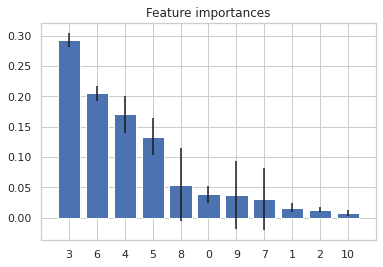

,features,importance
3,org_id,0.293394
6,creation_day,0.204772
4,creation_year,0.170147
5,creation_month,0.133685
8,last_session_month,0.054419
0,creation_source,0.038687
9,last_session_day,0.036800
7,last_session_year,0.030895
1,opted_in_to_mailing_list,0.016536
2,enabled_for_marketing_drip,0.013290


In [80]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20,random_state=0,criterion='gini', class_weight='balanced')

clf.fit(X_train, y_train.ravel())
Accuracy=clf.score(X_train, y_train.ravel())
print('Accuracy:',Accuracy,'\n')

importFeature = clf.feature_importances_
feature_importances=pd.DataFrame([importFeature])

std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importFeature)[::-1]

print("Feature ranking:")

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importFeature[indices],color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

feature_importances=pd.DataFrame(pd.Series(col_names)[indices])
feature_importances['importance']=np.sort(importFeature)[::-1]
feature_importances.columns=['features','importance']
feature_importances

**Explanation:**

The dataset given is incorrect though the accuracy is 99%, However it is separating the data too well.This maybe because the dataset/model is overfitting.The adopted Users in the dataset to be the group of users who were assigned 'Organisatio_id',the last login time and the time id's were created.From this, we could see that users from particular group login more frequently than others for some unspecified/unknown reason.I believe we need more features in the dataset in order to get into a proper model for describing user adoption